In [12]:
import math
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import random
import pandas as pd

In [ ]:
'''
Running code:
I wrote the codes with Jupyter notebook.
The code could be run by running each cell in its order.
I have commented sections with each questions solved by the following code.

Running previous cell again might have disrupted output as I have used repeated variable name.
So output should be cleared to re-run previous cells. 
'''

In [8]:
def euclideanDist(p1, p2):
    dist = 0.0
    for i in range (len(p1)):
        dist += (p1[i]-p2[i])**2
    return math.sqrt(dist)

In [3]:
#data is 2d-list
#kmean algorithm using designated initial center
def kmean1(data, k, initC):

    stable = False   
    clusterNum = [-1]*len(data) #each sample with its cluster
    objs = []
    while not stable:
        #assign samples to cluster
        clust = [[] for i in range(k)]
        stable = True
        for i, sample in enumerate(data):
            c_ind = -1
            distToC = math.inf
            #add to closet cluster
            for j, center in enumerate(initC):
                dist = euclideanDist(sample, center)
                if (dist < distToC):
                    distToC = dist
                    c_ind = j
            clust[c_ind].append(i)
            if clusterNum[i] != c_ind:
                stable = False
                clusterNum[i] = c_ind
            
        #recalculate the center
        centers = []
        for i, cluster in enumerate(clust):
            clusterSize = len(clust[i])
            featureSize = len(data[0])
            newCenter = [0] * featureSize
            for sampleI in cluster:
                for j, feature in enumerate(data[sampleI]):
                    newCenter[j] += feature / clusterSize
            centers.append(newCenter)

        initC = centers #update centers
        
        #calculate objective function
        obj = 0.0
        for i, cluster in enumerate(clust):
             for sampleI in cluster:
                    obj += euclideanDist(data[sampleI], centers[i])
        objs.append(obj)
            
        
    return clust, objs
            
 
    

In [4]:
#parse data test_mean.txt
lines = []
k1, k2, k3 = [],[],[]
with open('test_mean.txt') as f:
    lines = f.readlines()
for line in lines:
    line = line.strip()
    line = line.split()
    k1.append(float(line[0]))
    k2.append(float(line[1]))
    k3.append(float(line[2]))
kmeans = [k1,k2,k3]


In [5]:
#parse hip1000.txt

hiparray = np.loadtxt(open("hip1000.txt"), delimiter=",")

hipT = np.transpose(hiparray)
#clustering genes, each genes has 208 features
hipgene = np.array(hipT)


[10006.004122814687, 9483.620543798621, 9441.146400663418, 9441.146400663418]


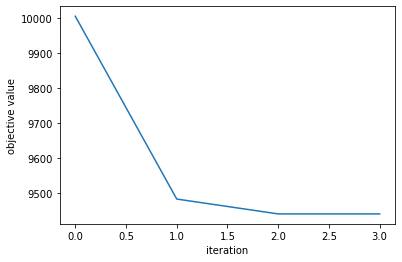

In [26]:
'''
Q4a
At convergence, the objective value is 9441.15. 
'''
cluster, obj = kmean1(hipgene, 3, kmeans)
print(obj)
plt.plot(obj)
plt.xlabel("iteration")
plt.ylabel("objective value")
plt.show()


In [10]:
#k-mean algorithm with randomized initializatioin. 

'''
Codes for Q4b-d
'''
def kmean2(data, k):
    
    rdInt = []
    for i in range(k):
        rdInt.append(random.randint(0,len(data)-1))
    initC = []
    for i in rdInt:
        initC.append(data[i])
    stable = False   
    clusterNum = [-1]*len(data) #each sample with its cluster
    objs = []
    
    while not stable:
        #assign samples to cluster
        clust = [[] for i in range(k)]
        stable = True
        for i, sample in enumerate(data):
            c_ind = -1
            distToC = math.inf
            #add to closet cluster
            for j, center in enumerate(initC):
                dist = euclideanDist(sample, center)
                if (dist < distToC):
                    distToC = dist
                    c_ind = j
            clust[c_ind].append(i)
            #check
            if clusterNum[i] != c_ind:
                stable = False
                clusterNum[i] = c_ind
            
        #recalculate the center
        centers = []
        for i, cluster in enumerate(clust):
            clusterSize = len(clust[i])
            featureSize = len(data[0])
            newCenter = [0] * featureSize
            for sampleI in cluster:
                for j, feature in enumerate(data[sampleI]):
                    newCenter[j] += feature / clusterSize
            centers.append(newCenter)

        initC = centers #update centers
        
        obj = 0.0
        for i, cluster in enumerate(clust):
            for sampleI in cluster:
                obj += euclideanDist(data[sampleI], centers[i])
        objs.append(obj)
    
    clusteredData = []
    for cluster in clust:
        for sampleI in cluster:
            clusteredData.append(data[sampleI])
            
   
    
    return clusteredData, clust, objs

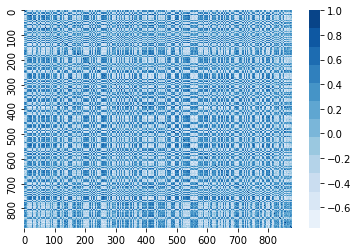

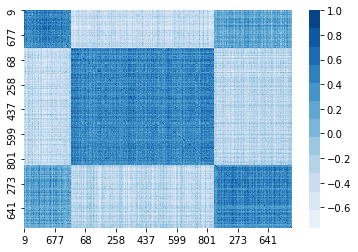

In [28]:
'''
Q4b
'''
#process data for covariance matrix
index = []
for i in range(len(hiparray[0])):
    index.append(i)
raw = pd.DataFrame(hiparray, columns = index)

clusteredData, clust, objs = kmean2(hipgene,3)
clusteredData = np.array(clusteredData)
clusteredT = np.transpose(clusteredData)
clustInt = np.concatenate(clust)
clustered = pd.DataFrame(clusteredT, columns = clustInt)

#plot covariance matrix with seaborn
raw_corr = raw.corr()
colormap = sn.color_palette("Blues", 12)
sn.heatmap(raw_corr, xticklabels=100, yticklabels=100, cmap = colormap)
plt.show()

clustered_corr = clustered.corr()
sn.heatmap(clustered_corr, xticklabels=100, yticklabels=100, cmap = colormap)
plt.show()


In [29]:

'''
Q4c
'''
#run kmean=3 for 10 random initialization
#record correlation coefficient matrix and objective convergence
corMats = []
objlist = []
for i in range(10):
    clusteredData, clust, objs = kmean2(hipgene,3)
    clusteredData = np.array(clusteredData)
    clusteredT = np.transpose(clusteredData)
    clustInt = np.concatenate(clust)
    clustered = pd.DataFrame(clusteredT, columns = clustInt)
    clustered_corr = clustered.corr()
    corMats.append(clustered_corr)
    objlist.append(objs)



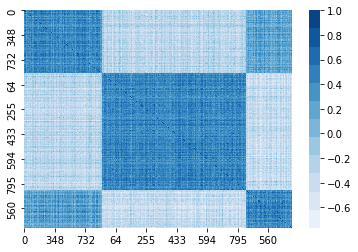

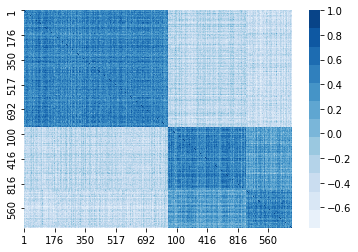

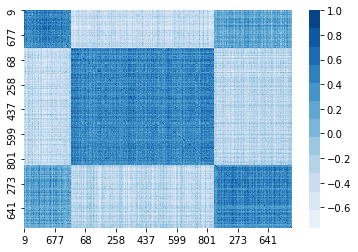

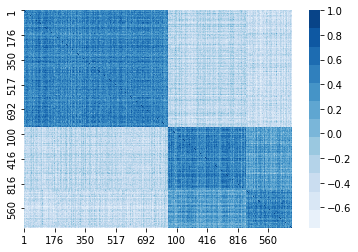

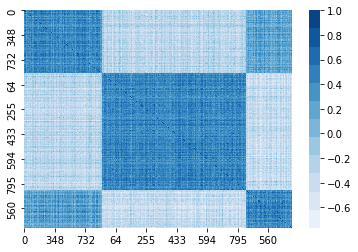

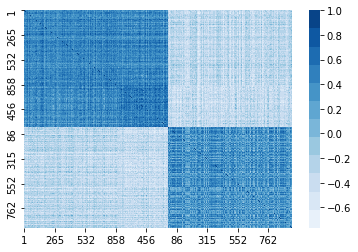

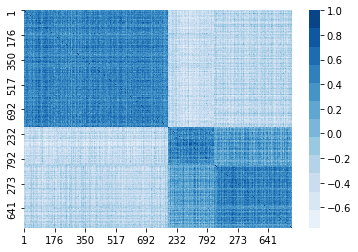

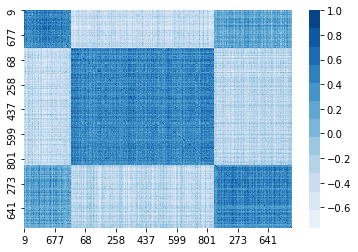

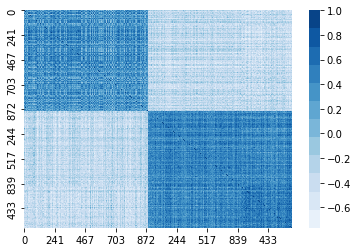

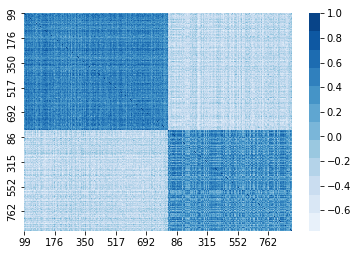

In [30]:
#Q4c correlation matrix plot

colormap = sn.color_palette("Blues", 12)
for i, mat in enumerate(corMats):
    sn.heatmap(mat, xticklabels=100, yticklabels=100, cmap=colormap)
    plt.show()

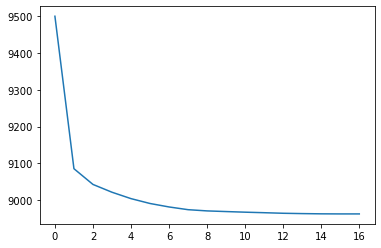

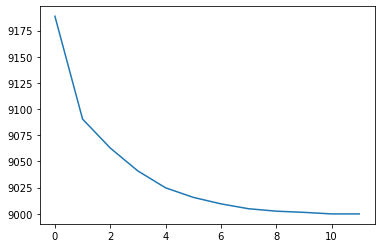

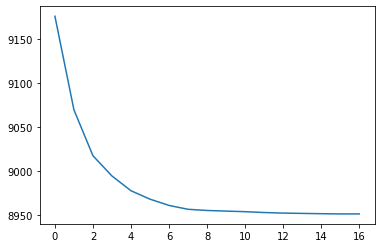

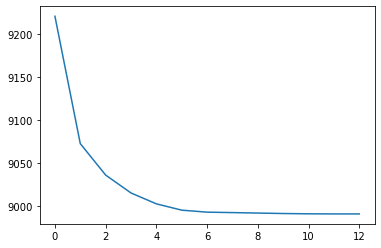

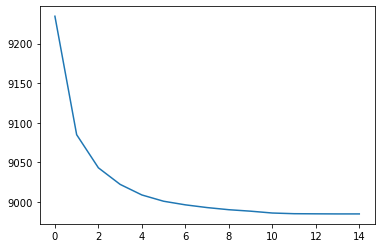

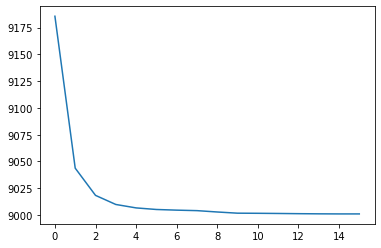

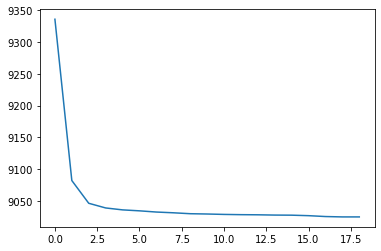

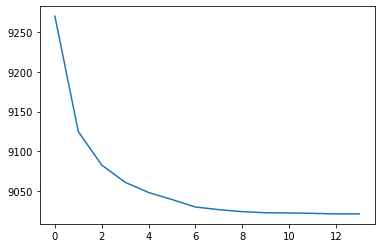

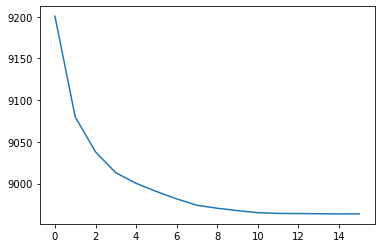

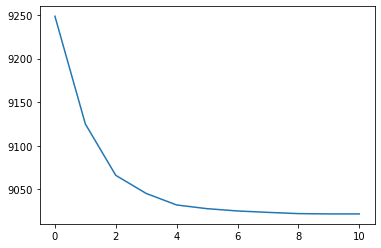

[8963.0065, 8999.8549, 8951.4856, 8990.8576, 8984.7895, 9000.9966, 9024.5484, 9021.6097, 8963.7276, 9021.7873]


In [77]:
#q4c convergence of objective value
conv = []

for i, obj in enumerate(objlist):
    conv.append(round(obj[-1],4))
    plt.plot(obj)
    plt.show()

print(conv)

In [41]:
'''
Q4d:
Runing k = 3 to k = 12, with 10 random initialization. 
'''
total_corM = []
total_obj = []
for k  in range(3,13):
    corMats = []
    objlist = []
    for i in range(10):
        clusteredData, clust, objs = kmean2(hipgene,k)
        clusteredData = np.array(clusteredData)
        clusteredT = np.transpose(clusteredData)
        clustInt = np.concatenate(clust)
        clustered = pd.DataFrame(clusteredT, columns = clustInt)
        clustered_corr = clustered.corr()
        corMats.append(clustered_corr)
        objlist.append(objs)
    total_corM.append(corMats)
    total_obj.append(objlist)
    print("completed k mean with", k) #running takes a long time, used this to track process.


completed k mean with 3
completed k mean with 4
completed k mean with 5
completed k mean with 6
completed k mean with 7
completed k mean with 8
completed k mean with 9
completed k mean with 10
completed k mean with 11
completed k mean with 12


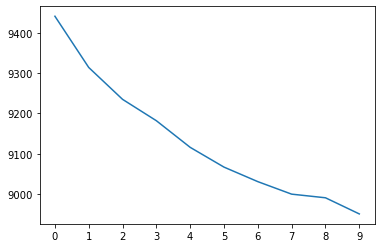

[9441, 9314, 9235, 9182, 9116, 9067, 9031, 9000, 8991, 8951]


In [64]:
#select lowest obj_value with each K
#plot to see the decrease in obj with increase of k.

conv = []
for ktrials in total_obj:
    oneMin = []
    for objList in ktrials:
        oneMin.append((round(min(objList))))
    conv.append(min(oneMin))

plt.xticks(range(0,10))
plt.plot(conv)
plt.show()
print(conv)

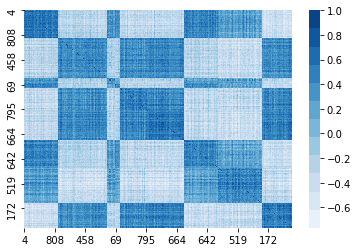

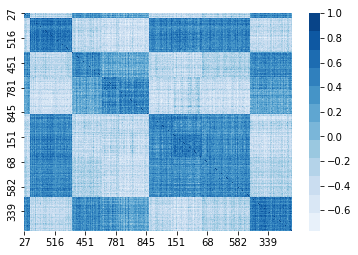

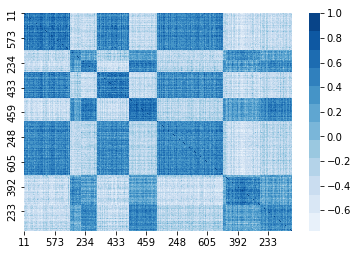

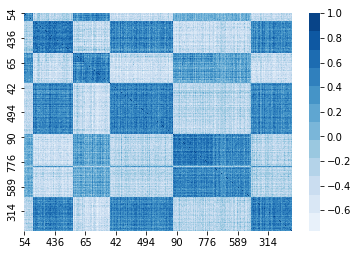

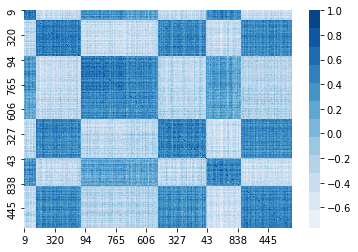

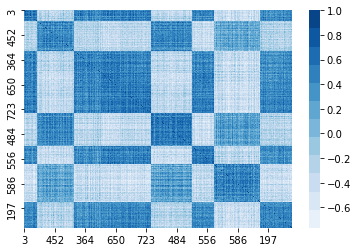

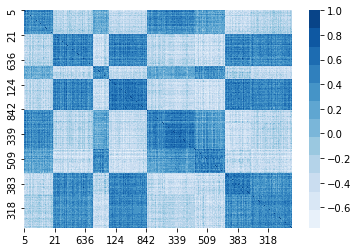

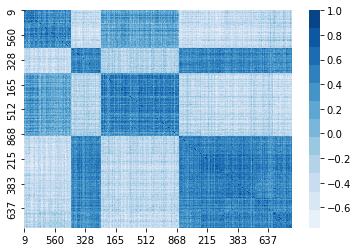

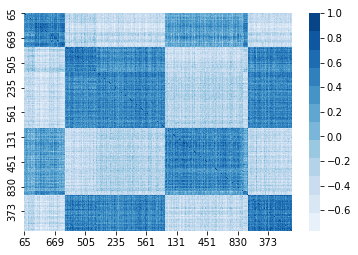

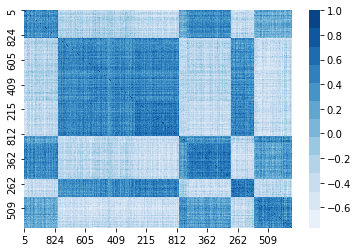

In [76]:
#Based on results of abrupt change of obj_value
#plot the correlation matrix

for mat in total_corM[6]:
    sn.heatmap(mat, xticklabels=100, yticklabels=100, cmap=colormap)
    plt.show()
        